# Theano Basics

## Multiplying two numbers

In [24]:
import theano
import numpy as np
from theano import tensor as T

In [48]:
a = T.scalar()
b = T.scalar()
y = a * b
func = theano.function(inputs=[a, b], outputs=y)

print func(1, 2) # 2.0
print func(3, 3) # 9.0

2.0
9.0


## Dot product of two vectors

In [26]:
a = T.vector()
b = T.vector()
y = T.dot(a, b)
func = theano.function(inputs=[a, b], outputs=y)

print func(np.array([1,2,3], dtype='float32'),
           np.array([2,3,4], dtype='float32'))

20.0


## Matrix-matrix product

In [27]:
a = T.matrix()
b = T.matrix()
y = T.dot(a, b)
func = theano.function(inputs=[a, b], outputs=y)

print func(np.matrix(np.arange(0, 9).reshape((3, 3)), dtype='float32'),
           np.matrix(np.arange(0, 9).reshape((3, 3)), dtype='float32'))

[[  15.   18.   21.]
 [  42.   54.   66.]
 [  69.   90.  111.]]


## Tensors

<img src="theano_types_50.png">

In [32]:
# note that (False,)*3 evaluates to (False, False, False)
#
tensor3 = T.TensorType(broadcastable=(False,)*3, dtype='float32')
x = tensor3()

## Theano scan

### Computing Jacobian matrix (1st derivative of cost function)

In [53]:
x = T.dvector('x')
y = x ** 2
J, updates = theano.scan(lambda i, y, x : T.grad(y[i], x),
                         sequences=T.arange(y.shape[0]),
                         non_sequences=[y,x])
f = theano.function([x], J, updates=updates)
f([4, 4])

array([[ 8.,  0.],
       [ 0.,  8.]])

### Computing Hessian matrix (2nd derivative of cost function)

In [49]:
x = T.dvector()
y = x ** 2
cost = y.sum()

gy = T.grad(cost, x)
H, updates = theano.scan(lambda i, gy, x: T.grad(gy[i], x),
                         sequences=T.arange(gy.shape[0]),
                         non_sequences=[gy, x])
f = theano.function([x], H, updates=updates)
f([4, 4])

array([[ 2.,  0.],
       [ 0.,  2.]])

## Linear Regression with Theano

Generate some data:

In [4]:
import numpy as np

trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

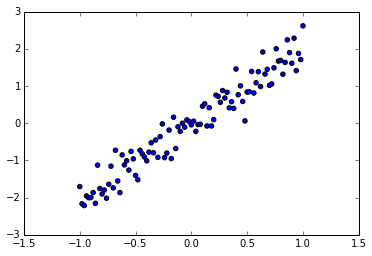

In [6]:
plt.scatter(trX, trY)

Define our model

In [7]:
X = T.scalar()
Y = T.scalar()

def model(X, w):
    return X * w

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w)

learning_rate = 0.01
cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost=cost, wrt=w)
updates = [[w, w - gradient * learning_rate]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates,
                        allow_input_downcast=True)

In [8]:
num_epochs = 15
errors = []
for epoch in range(num_epochs):
    error = 0.0
    for x, y in zip(trX, trY):
        error += train(x, y)
    print epoch, error
    errors.append(error)

print
print "estimated slope:", w.get_value() # something around 2

0 89.6422580142
1 30.0799539874
2 15.068943012
3 11.2714783802
4 10.3036310385
5 10.053394928
6 9.98693891032
7 9.96843384798
8 9.9628743145
9 9.96102173617
10 9.96032827211
11 9.96003827188
12 9.959910038
13 9.95984731052
14 9.95981658681

estimated slope: 2.05038738251


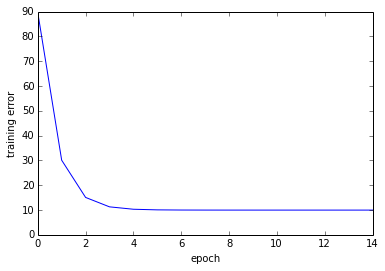

In [9]:
plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('training error')

## Symbolic Differentiation and Code Generation

In [11]:
a = theano.tensor.vector("a")      # declare symbolic variable
b = a + a ** 10                    # build symbolic expression
f = theano.function([a], b)        # compile function
print f([0, 1, 2])                 # prints `array([0,2,1026])`
theano.printing.pydotprint(b, outfile="symbolic_graph_unopt.png", var_with_name_simple=True)
theano.printing.pydotprint(f, outfile="symbolic_graph_opt.png", var_with_name_simple=True)

[    0.     2.  1026.]
The output file is available at symbolic_graph_unopt.png
The output file is available at symbolic_graph_opt.png


### Unoptimized

<img src="symbolic_graph_unopt.png">

### Optimized

<img src="symbolic_graph_opt.png">